# Principal Component Analysis

## import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [32]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

In [33]:
print(number_data, number_feature)

50 2


## plot the input data

In [34]:
Z = np.c_[x, y]

In [35]:
Z.shape

(50, 2)

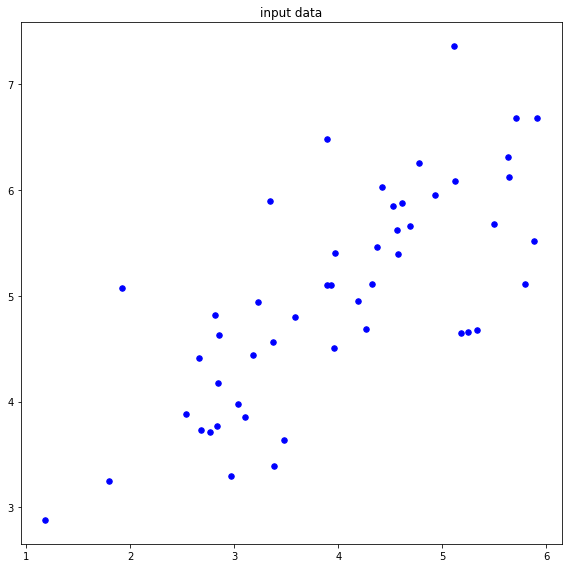

In [36]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

In [38]:
np.mean(x)

3.9892652

In [230]:
def plot_data_normalized(x, y):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')

    x = (x - np.mean(x)) / np.std(x)
    y = (y - np.mean(y)) / np.std(y)
    Z = np.c_[x, y]

    plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')

    plt.tight_layout()
    plt.show()

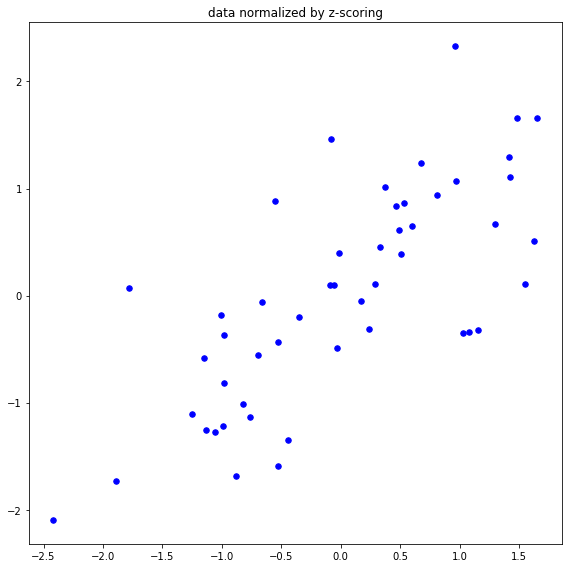

In [231]:
plot_data_normalized(x, y)

In [47]:
print("mean of x =", np.mean(x))
print("mean of y =", np.mean(y))
print("std of x =", np.std(x))
print("std of y =", np.std(y))

mean of x = -2.220446049250313e-18
mean of y = -8.881784197001253e-18
std of x = 1.0
std of y = 1.0


## compute covariance matrix

In [64]:
Z.shape

(50, 2)

In [51]:
def compute_covariance(Z):
    
    Sigma = 1 / len(Z) * np.dot(Z.T,Z)
    
    return Sigma

In [65]:
compute_covariance(Z)

array([[1.     , 0.73553],
       [0.73553, 1.     ]])

## compute principal directions

In [62]:
def compute_eigen(X):
    S, U = np.linalg.eig(X)
    return S, U

In [132]:
S, U = compute_eigen(compute_covariance(Z))
S, U

(array([1.73553, 0.26447]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [133]:
scaled_U =  np.c_[S[0] * U[:,0], S[1] * U[:,1]]

In [134]:
scaled_U

array([[ 1.22720503, -0.18700853],
       [ 1.22720503,  0.18700853]])

In [233]:
def plot_principal_directions(Z, U):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')

    #o = np.array([[0,0],[0,0]])
    #plt.quiver(*o, scaled_U[0], scaled_U[1], color=['r','g'])

    plt.arrow(0, 0, U[0][0], U[1][0], color='r', width = 0.03)
    plt.arrow(0, 0, U[0][1], U[1][1], color='g', width = 0.03)

    plt.tight_layout()

    plt.show()

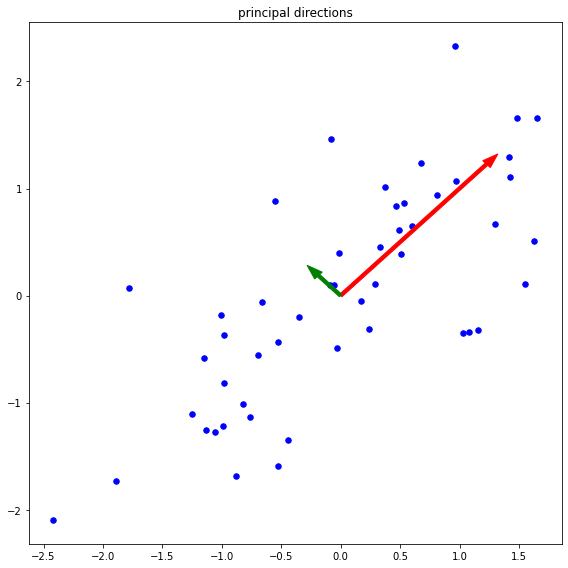

In [234]:
plot_principal_directions(Z, scaled_U)

## first principal axis

In [237]:
def plot_first_principal_axis(feature, vector):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    plt.scatter(feature[:,0], feature[:,1], s = 30, color = 'blue')
    plt.axline((0,0), vector[:,0], color='r')

    plt.plot()

    plt.tight_layout()
    plt.show()

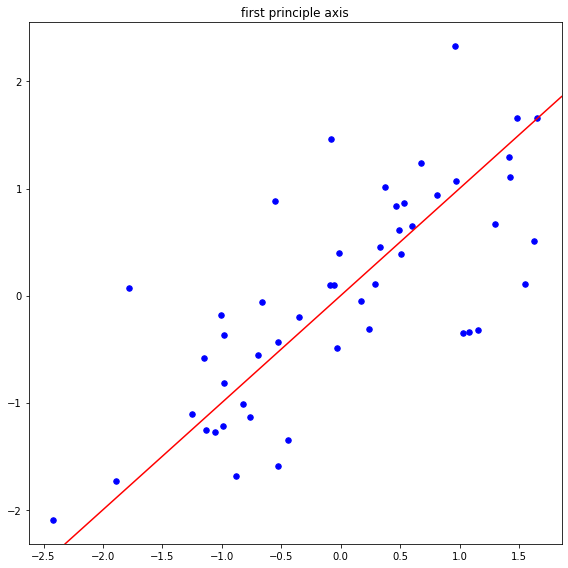

In [238]:
plot_first_principal_axis(Z, scaled_U)

## second principal axis

In [240]:
def plot_first_principal_axis(feature, vector):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    plt.scatter(Z[:,0], Z[:,1], s = 30, color = 'blue')
    plt.axline((0,0), scaled_U[:,1], color='r')

    plt.plot()

    plt.tight_layout()
    plt.show()

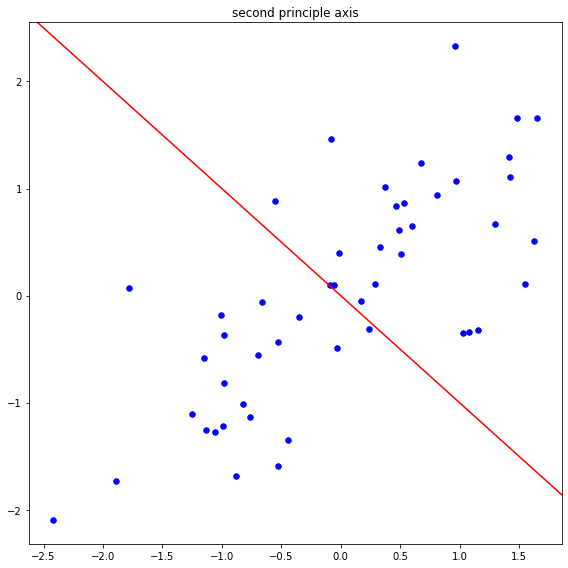

In [241]:
plot_first_principal_axis(Z, scaled_U)

## compute the projection of point onto the line

In [210]:
def compute_projection_onto_line(feature, vector):

    vector_norm = np.sqrt(sum(vector**2))
    projection = np.zeros(shape=(50,2))
    for i in range(len(feature)):
        proj = (np.dot(feature[i], vector)/vector_norm**2) * vector
        projection[i] = proj
        
    return projection

In [176]:
(np.dot(Z, scaled_U[:,0])/np.sqrt(sum(scaled_U[:,0]**2))).shape

(50,)

In [170]:
scaled_U[:,0].shape

(2,)

## project to the first principal axis

In [244]:
def project_to_first_axis(feature, vector):
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    plt.scatter(feature[:,0], feature[:,1], s = 30, color = 'blue')

    proj_Z = compute_projection_onto_line(feature, vector[:,0])
    plt.scatter(proj_Z[:,0], proj_Z[:,1], s = 30, color = 'g', zorder=2)

    plt.axline((0,0), vector[:,0], color='r', zorder=1)

    plt.tight_layout()
    plt.show()

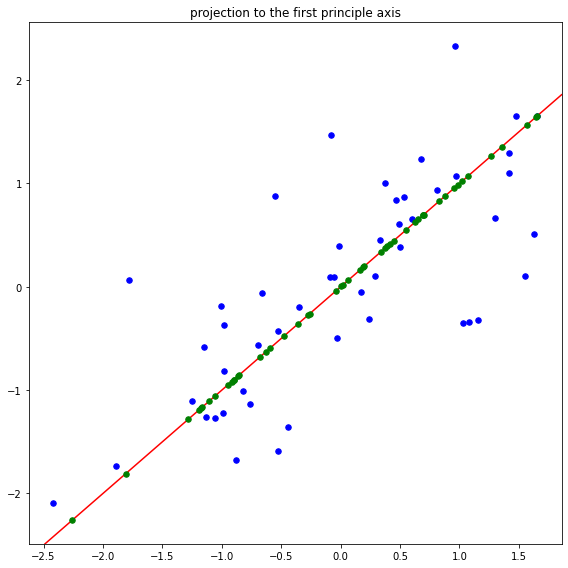

In [245]:
project_to_first_axis(Z, scaled_U)

## project to the second principal axis

In [248]:
def project_to_second_axis(feature, vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    plt.scatter(feature[:,0], feature[:,1], s = 30, color = 'blue')

    proj_Z = compute_projection_onto_line(feature, vector[:,1])
    plt.scatter(proj_Z[:,0], proj_Z[:,1], s = 30, color = 'g', zorder=2)

    plt.axline((0,0), vector[:,1], color='r', zorder=1)

    plt.tight_layout()
    plt.show()

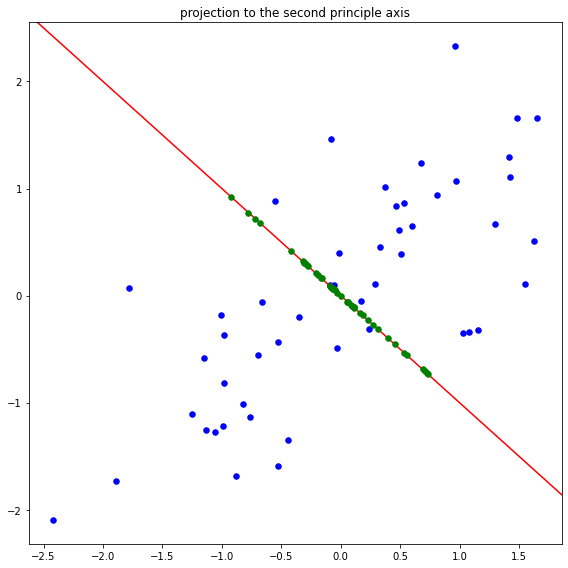

In [251]:
project_to_second_axis(Z, scaled_U)

## connect original data to the projection onto the first principal axis

In [254]:
def projection_to_first_principle_axis(feature, vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    plt.scatter(feature[:,0], feature[:,1], s = 30, color = 'blue')

    proj_Z = compute_projection_onto_line(feature, vector[:,0])
    plt.scatter(proj_Z[:,0], proj_Z[:,1], s = 30, color = 'g', zorder=2)

    plt.axline((0,0), vector[:,0], color='r', zorder=1)

    for i, j in zip(feature, proj_Z):
        plt.plot([i[0], j[0]], [i[1], j[1]], c='gray')

    plt.tight_layout()
    plt.show()

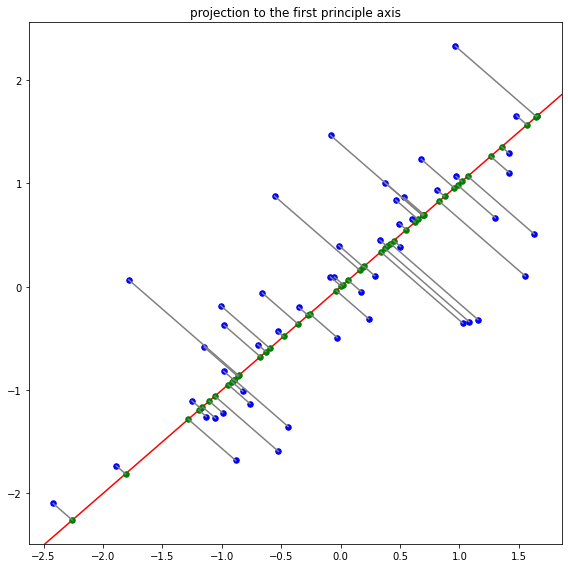

In [255]:
projection_to_first_principle_axis(Z, scaled_U)

## connect original data to the projection onto the second principal axis

In [258]:
def projection_to_second_principle_axis(feature, vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    plt.scatter(feature[:,0], feature[:,1], s = 30, color = 'blue')

    proj_Z = compute_projection_onto_line(feature, vector[:,1])
    plt.scatter(proj_Z[:,0], proj_Z[:,1], s = 30, color = 'g', zorder=2)

    plt.axline((0,0), vector[:,1], color='r', zorder=1)

    for i, j in zip(feature, proj_Z):
        plt.plot([i[0], j[0]], [i[1], j[1]], c='gray')

    plt.tight_layout()
    plt.show()

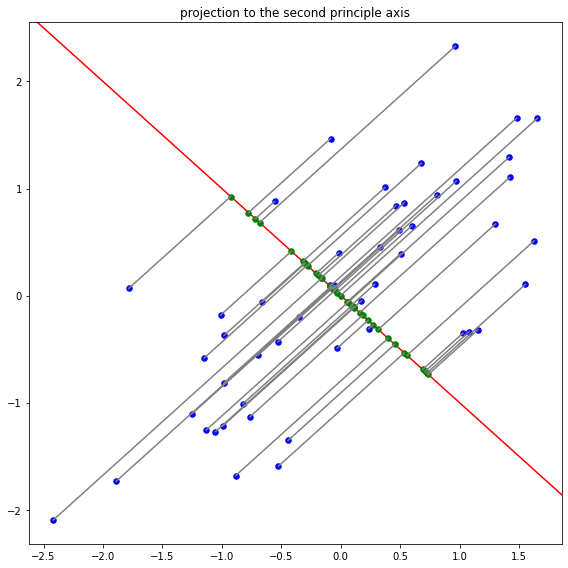

In [260]:
projection_to_second_principle_axis(Z, scaled_U)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

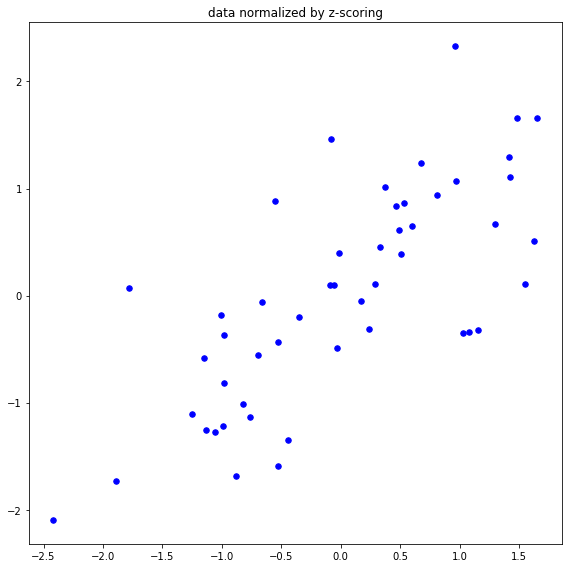

In [232]:
plot_data_normalized(x, y)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

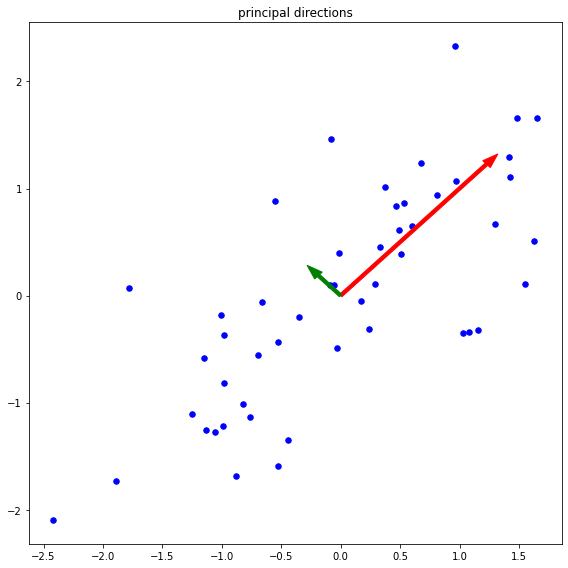

In [235]:
plot_principal_directions(Z, scaled_U)

***

### 3. plot the first principal axis in red on the normalized data in blue

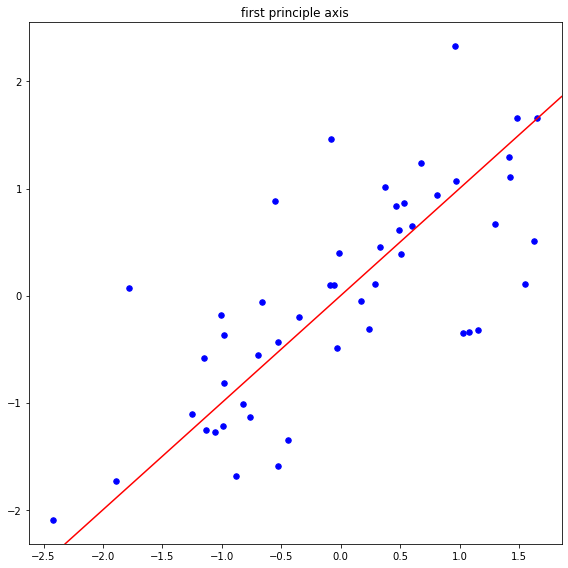

In [239]:
plot_first_principal_axis(Z, scaled_U)

***

### 4. plot the second principal axis in red on the normalized data in blue

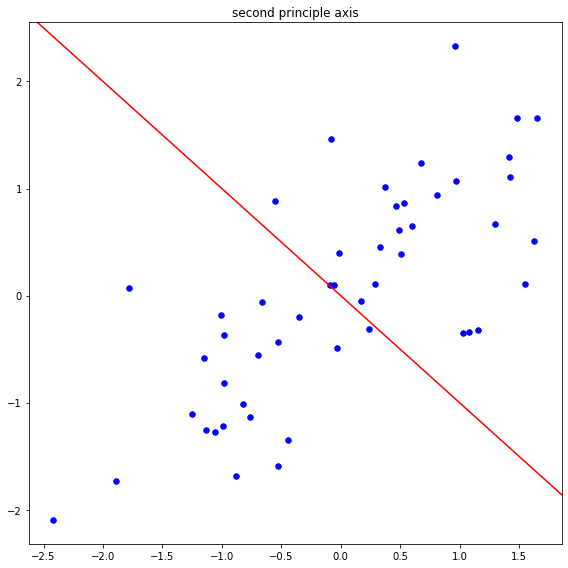

In [242]:
plot_first_principal_axis(Z, scaled_U)

***

### 5. plot the projection of data in green onto the first principal axis in red

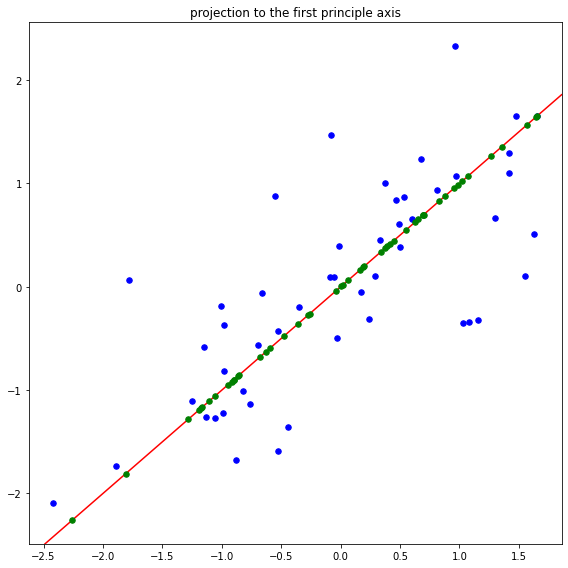

In [246]:
project_to_first_axis(Z, scaled_U)

***

### 6. plot the projection of data in green onto the second principal axis in red

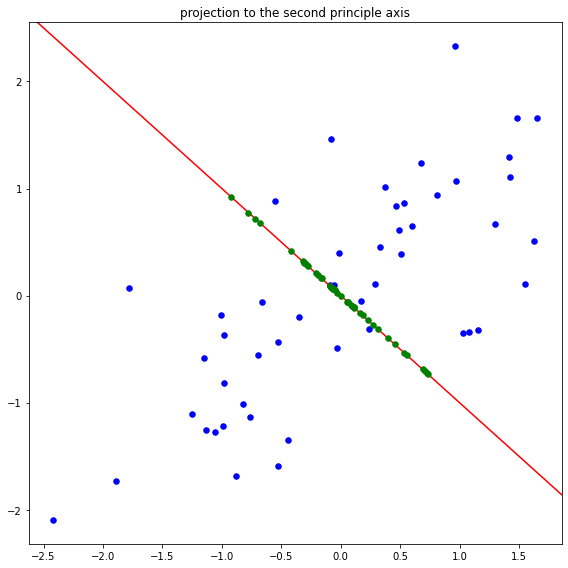

In [252]:
project_to_second_axis(Z, scaled_U)

***

### 7. plot the projection line in grey onto the first principal axis

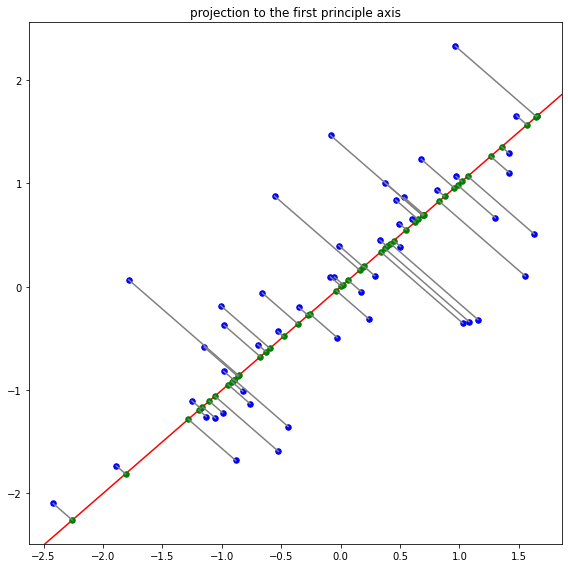

In [256]:
projection_to_first_principle_axis(Z, scaled_U)

***

### 8. plot the projection line in grey onto the second principal axis

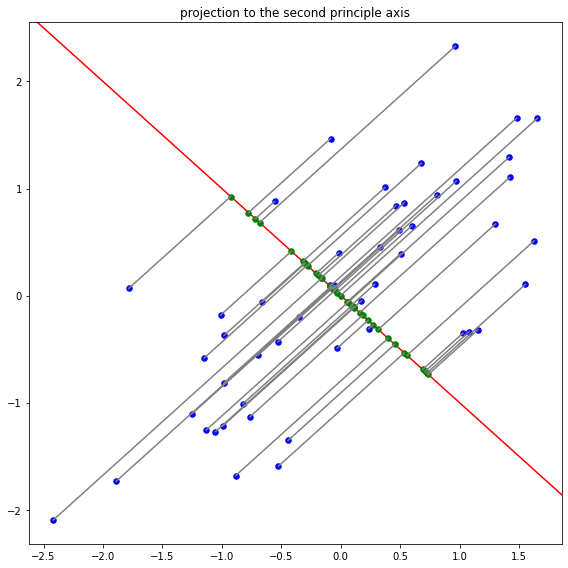

In [261]:
projection_to_second_principle_axis(Z, scaled_U)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***